In [1]:
import torch
from torch import nn
#nn has all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt

#checking PyTorch version
torch.__version__

'2.7.0+cpu'

In [2]:
# We'll use linear regression formula using straight with known parameters
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)

Y=weight*X+bias
X[:10],Y[:10],len(X),len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
#creating train/test split
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

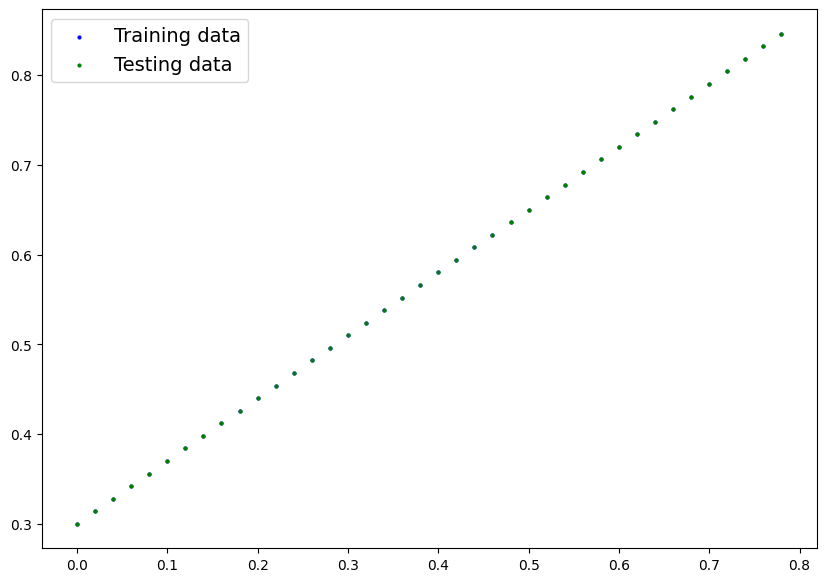

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions,
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4, label="Training data")
    
    #Plot test data in blue
    plt.scatter(train_data,train_labels,c="g",s=4, label="Testing data")
    
    if predictions is not None:
        #plot predictions if they appear
        plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
    
    #show the legends
    plt.legend(prop={"size":14})
    
plot_predictions()

In [5]:
# Building first pytorch model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        self.bias=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        #forward method to define the compution in model
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias #this is linear regression

In [6]:
#Creating a random seed
torch.manual_seed(42)

#Creatinga n instance of a modle

model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
#Making predictions
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

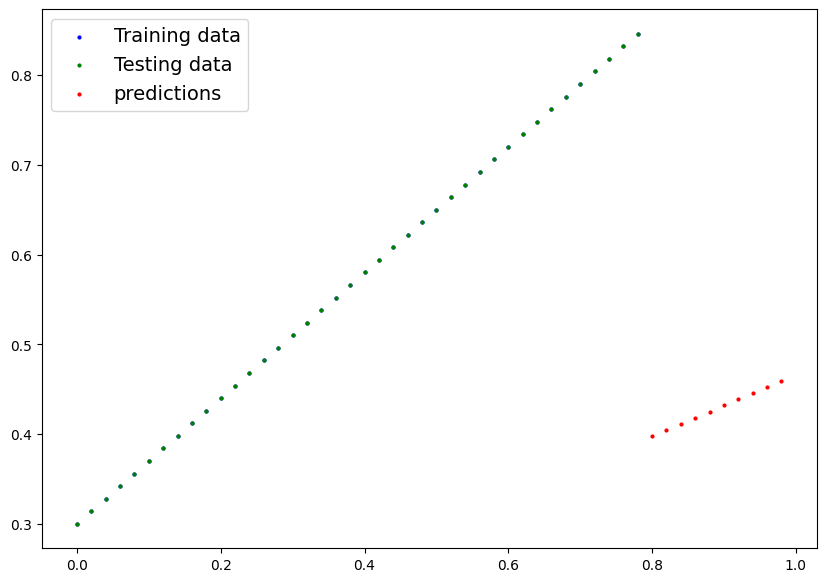

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
#setting up loss function
loss_fn=nn.L1Loss()

#setting up optimizer(we'll use SGD for now)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)#lr is learning rate

In [ ]:
# building a training loop and testing loop in PyTorch

#epoch is one loop through data
epochs=1

# step 0
for epoch in range(epochs):
    #set the model to training mode
    model_0.train()
    
    # 1. forward pass
    y_preds=model_0(X_train)
    
    # 2. calculation loss
    loss=loss_fn(y_preds,Y_train)
    
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Performing back propogation
    loss.backward()
    
    # 5. Step the optimiser
    optimizer.step() # tells the optimizer how the changes will accumulate through the loop so we have to zero them in step 3
    
    
    model_0.eval
    